In [1]:
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, AdamW
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.nn import CrossEntropyLoss
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
import sys
import numpy as np
import os
import cv2

/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Use os.path.join to ensure correct path formatting
project_path = os.path.join("/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/segment-anything")
sys.path.append(project_path)

In [3]:
from segment_anything import sam_model_registry,  SamAutomaticMaskGenerator
sam = sam_model_registry["vit_b"](checkpoint="/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/colab_files_to_train_models/sam_vit_b_01ec64.pth")

/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/segment-anything/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict

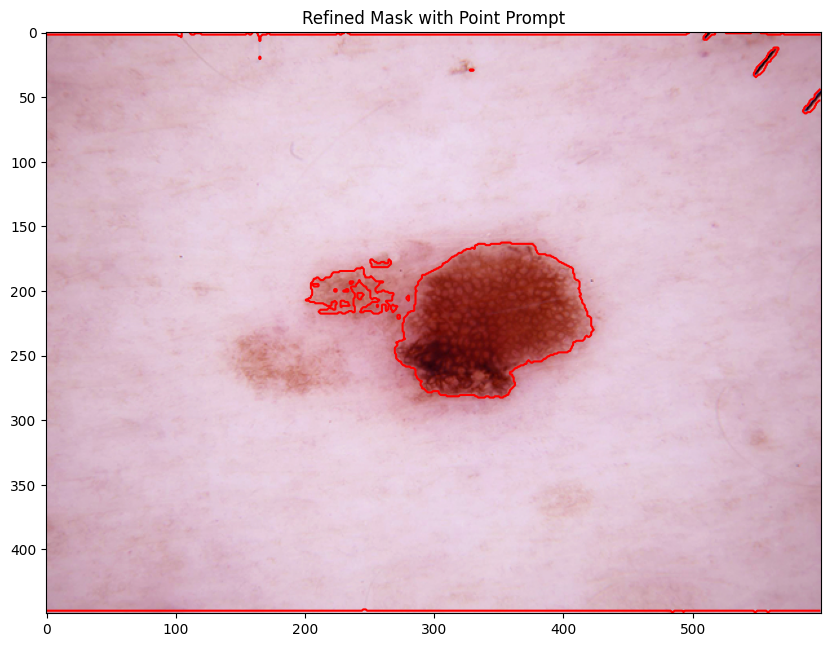

In [7]:
from segment_anything import SamPredictor, sam_model_registry
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the SAM model
sam = sam_model_registry["vit_b"](checkpoint="/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/colab_files_to_train_models/sam_vit_b_01ec64.pth")  # Provide your SAM checkpoint path
predictor = SamPredictor(sam)

# Load and prepare the image
image_path = "/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_images_part_1/ISIC_0024313.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set the image in the predictor
predictor.set_image(image_rgb)

# Define a point in the dark region (adjust the coordinates as needed)
input_point = np.array([[180, 200]])  # Example coordinates, adjust based on your image
input_label = np.array([1])  # 1 indicates it's a foreground point

# Predict the mask using the point prompt
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False  # Only return the most confident mask
)

# Plot the resulting mask
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.contour(masks[0], colors='red')
plt.title("Refined Mask with Point Prompt")
plt.show()


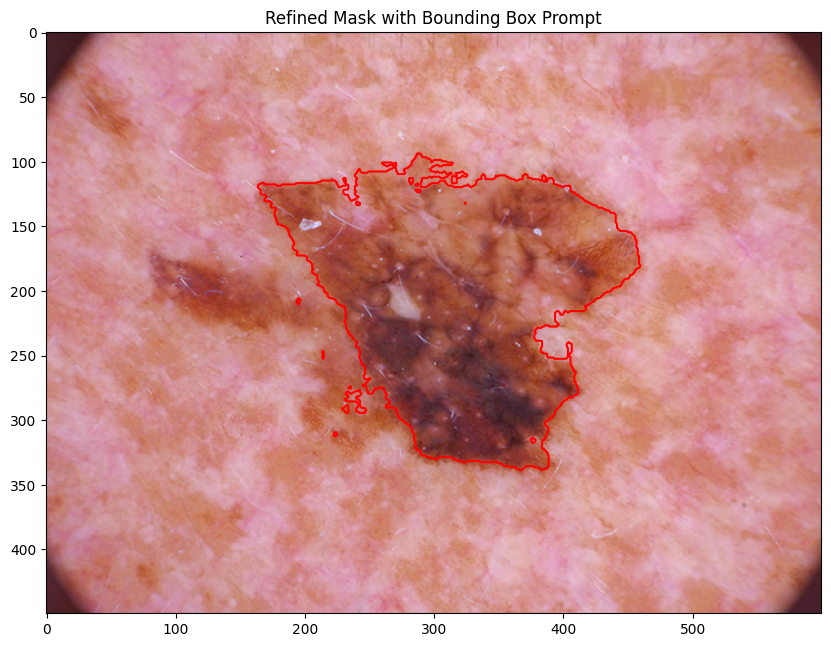

In [ ]:
# creating mask from the provided bounding box prompt 

# Load the SAM model
sam = sam_model_registry["vit_b"](checkpoint="/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/colab_files_to_train_models/sam_vit_b_01ec64.pth")  # Provide your SAM checkpoint path
predictor = SamPredictor(sam)

# Load and prepare the image
image_path = "/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_images_part_1/ISIC_0024310.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set the image in the predictor
predictor.set_image(image_rgb)

# Define a bounding box around the target area (adjust coordinates as needed)
# Format for the bounding box is [x_min, y_min, x_max, y_max]
input_box = np.array([150, 80, 470, 400])  # Example coordinates for bounding box

# Predict the mask using the bounding box prompt
masks, _, _ = predictor.predict(
    box=input_box,
    multimask_output=False  # Only return the most confident mask
)

# Plot the resulting mask
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.contour(masks[0], colors='red')
plt.title("Refined Mask with Bounding Box Prompt")
plt.show()


In [ ]:

base_skin_dir = '/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive'

metadata = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

part1 = os.path.join(base_skin_dir, 'HAM10000_images_part_1')
part2 = os.path.join(base_skin_dir, 'HAM10000_images_part_2')

# Dictionary to store image paths
image_path_dict = {}

# Load image paths from part1 and part2 folders
for folder in [part1, part2]:
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_id = filename.split('.')[0]  # Remove ".jpg" from filename to get ID
            image_path_dict[image_id] = os.path.join(folder, filename)

metadata['image_path'] = metadata['image_id'].map(image_path_dict)

# Check for missing image paths
print(metadata[metadata['image_path'].isnull()])

print(metadata.head())




Empty DataFrame
Columns: [lesion_id, image_id, dx, dx_type, age, sex, localization, image_path]
Index: []
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  
0  /Users/binitachhetri/Downloads/CapstoneProject...  
1  /Users/binitachhetri/Downloads/CapstoneProject...  
2  /Users/binitachhetri/Downloads/CapstoneProject...  
3  /Users/binitachhetri/Downloads/CapstoneProject...  
4  /Users/binitachhetri/Downloads/CapstoneProject...  


#####
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'}